# Introduction

This step focuses on collecting data, cleaning, filtering, organizing it, and making sure it's well defined. Well understood by the columns so that can be explored in EDA.  

# Recap of Data Science Problem

The purpose of this data science project is to come up with a model to see if the usage of social media has high impact on the injury number of people.

# Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
#pd.set_option('display.max_rows', None)

# Load The Self Harm Data

In [2]:
self_harm = '/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Data/Self_harm_All_Injury_Causes.csv'

In [3]:
#Read the csv file into data frame 
Self_harm = pd.read_csv(self_harm)

In [4]:
#Call the shape method on Self_harm to see size of the data
Self_harm.shape

(5889, 21)

First of all i want to see what is my data look like by looking at the variables with first few rows.

In [5]:
#Call the head method on Self_harm to print the first several rows of the data
Self_harm.head()

,Sex,Race/Ethnicity,First Year,Last Year,Cause of Injury,Disp,ageRangLo,ageRangHi,Age Group,Year,...,Population,records,suppressed,cv,Number of$Cases (Sample),Standard$Error,CV,Lower 95%$Confidence$Limit,Upper 95%$Confidence$Limit,ageadj
0,B,A,2001,2018,Self-harm All Injury Causes,All Cases,0,199,00-04,2001,...,"19,298,217",.,1,.,.,.,.,.,.,.
1,B,W,2001,2018,Self-harm All Injury Causes,All Cases,0,199,00-04,2001,...,"11,435,173",.,1,.,.,.,.,.,.,.
2,B,B,2001,2018,Self-harm All Injury Causes,All Cases,0,199,00-04,2001,...,"3,120,018",.,1,.,.,.,.,.,.,.
3,B,H,2001,2018,Self-harm All Injury Causes,All Cases,0,199,00-04,2001,...,"3,718,198",.,1,.,.,.,.,.,.,.
4,B,O,2001,2018,Self-harm All Injury Causes,All Cases,0,199,00-04,2001,...,"1,024,828",.,1,.,.,.,.,.,.,.


In [6]:
#Call the info method on Self_harm dataset to see a summary of the data
Self_harm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5889 entries, 0 to 5888
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sex                         5889 non-null   object
 1   Race/Ethnicity              5889 non-null   object
 2   First Year                  5889 non-null   int64 
 3   Last Year                   5889 non-null   int64 
 4   Cause of Injury             5889 non-null   object
 5   Disp                        5889 non-null   object
 6   ageRangLo                   5889 non-null   int64 
 7   ageRangHi                   5889 non-null   int64 
 8   Age Group                   5889 non-null   object
 9   Year                        5889 non-null   int64 
 10  Injuries                    5889 non-null   object
 11  Population                  5889 non-null   object
 12  records                     5889 non-null   object
 13  suppressed                  5889 non-null   obje

Next i want to see all the columns of my data and decide on the features of interest for this project.

In [7]:
#Call the columns method on Self_harm to print the columns of the data
Self_harm.columns

Index(['Sex', 'Race/Ethnicity', 'First Year', 'Last Year', 'Cause of Injury',
       'Disp', 'ageRangLo', 'ageRangHi', 'Age Group', 'Year', 'Injuries',
       'Population', 'records', 'suppressed', 'cv', 'Number of$Cases (Sample)',
       'Standard$Error', 'CV', 'Lower 95%$Confidence$Limit',
       'Upper 95%$Confidence$Limit', 'ageadj'],
      dtype='object')

In [8]:
#Call the dtypes method on Self_harm dataset to see the tpyes of columns
Self_harm.dtypes

Sex                           object
Race/Ethnicity                object
First Year                     int64
Last Year                      int64
Cause of Injury               object
Disp                          object
ageRangLo                      int64
ageRangHi                      int64
Age Group                     object
Year                           int64
Injuries                      object
Population                    object
records                       object
suppressed                    object
cv                            object
Number of$Cases (Sample)      object
Standard$Error                object
CV                            object
Lower 95%$Confidence$Limit    object
Upper 95%$Confidence$Limit    object
ageadj                        object
dtype: object

###  Pick the columns


1. Self_harm:
    * `Sex` 
    * `Race/Ethnicity`
    * `Cause of Injury`
    * `Disp`#Disposition (where the injured person went when released from emergency room)
    * `Age Group`
    * `Year`
    * `Injuries` #Number of injuries
    * `Population`  

I decided to select the columns that I will be working on from the Self harm data set. Subsetting the data frame will be providing better look and understanding of fatures. 

Subsetting the data frame by the columns of interest.


In [9]:
#Subset DataFrame object by the columns
Self_harm = Self_harm[['Sex','Race/Ethnicity', 'Cause of Injury','Disp','Age Group','Year','Injuries','Population']]

In [10]:
#Check the number of columns and observation on subset DataFrame
Self_harm.columns

Index(['Sex', 'Race/Ethnicity', 'Cause of Injury', 'Disp', 'Age Group', 'Year',
       'Injuries', 'Population'],
      dtype='object')

In [11]:
#Observe the first 5 entries on Self_harm 
Self_harm.head()

,Sex,Race/Ethnicity,Cause of Injury,Disp,Age Group,Year,Injuries,Population
0,B,A,Self-harm All Injury Causes,All Cases,00-04,2001,.,"19,298,217"
1,B,W,Self-harm All Injury Causes,All Cases,00-04,2001,.,"11,435,173"
2,B,B,Self-harm All Injury Causes,All Cases,00-04,2001,.,"3,120,018"
3,B,H,Self-harm All Injury Causes,All Cases,00-04,2001,.,"3,718,198"
4,B,O,Self-harm All Injury Causes,All Cases,00-04,2001,.,"1,024,828"


In [12]:
#Call the info method on Self_harm dataset to see a summary of the data
Self_harm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5889 entries, 0 to 5888
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              5889 non-null   object
 1   Race/Ethnicity   5889 non-null   object
 2   Cause of Injury  5889 non-null   object
 3   Disp             5889 non-null   object
 4   Age Group        5889 non-null   object
 5   Year             5889 non-null   int64 
 6   Injuries         5889 non-null   object
 7   Population       5889 non-null   object
dtypes: int64(1), object(7)
memory usage: 368.2+ KB


Next, I want to start making sure each field is the appropriate data type.

In [13]:
#Call the dtypes method on Self_harm dataset to see the tpyes of columns
Self_harm.dtypes

Sex                object
Race/Ethnicity     object
Cause of Injury    object
Disp               object
Age Group          object
Year                int64
Injuries           object
Population         object
dtype: object

It lkooks like we're going to need to make some changes here. I will began with 'Injuries' and 'Population' fields that are currently being read as an object rather than int64.  

In [14]:
inj_check = Self_harm[~Self_harm['Injuries'].apply(lambda x: x.isnumeric())]
print (Self_harm.shape)
print (inj_check.shape)
inj_check['Injuries'].value_counts()

(5889, 8)
(4261, 8)


.    4261
Name: Injuries, dtype: int64

In Injuries field we have 4261 entires as '.' . This means there is no record of injurie so i will replace all the '.' values with'0'. The amount of '.' values is pretty high deleting these rows will take away big portion of the data therefore keep them as '0'.

In [15]:
Self_harm['Injuries']=Self_harm['Injuries'].replace('.', 0)
Self_harm.head()

,Sex,Race/Ethnicity,Cause of Injury,Disp,Age Group,Year,Injuries,Population
0,B,A,Self-harm All Injury Causes,All Cases,00-04,2001,0,"19,298,217"
1,B,W,Self-harm All Injury Causes,All Cases,00-04,2001,0,"11,435,173"
2,B,B,Self-harm All Injury Causes,All Cases,00-04,2001,0,"3,120,018"
3,B,H,Self-harm All Injury Causes,All Cases,00-04,2001,0,"3,718,198"
4,B,O,Self-harm All Injury Causes,All Cases,00-04,2001,0,"1,024,828"


In [16]:
Self_harm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5889 entries, 0 to 5888
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              5889 non-null   object
 1   Race/Ethnicity   5889 non-null   object
 2   Cause of Injury  5889 non-null   object
 3   Disp             5889 non-null   object
 4   Age Group        5889 non-null   object
 5   Year             5889 non-null   int64 
 6   Injuries         5889 non-null   object
 7   Population       5889 non-null   object
dtypes: int64(1), object(7)
memory usage: 368.2+ KB


Injuries column still looks like an object! Convert it to int. 

In [17]:
Self_harm["Injuries"] = Self_harm["Injuries"].astype(str).astype(int)
print(Self_harm.dtypes)

Sex                object
Race/Ethnicity     object
Cause of Injury    object
Disp               object
Age Group          object
Year                int64
Injuries            int64
Population         object
dtype: object


I will repeat the same path for each column!


In [18]:
pop_check = Self_harm[~Self_harm['Population'].apply(lambda x: x.isnumeric())]
print (Self_harm.shape)
print (pop_check.shape)
pop_check['Population'].value_counts()

(5889, 8)
(5889, 8)


.             1029
1,596,423        1
7,497,842        1
236,253          1
1,517,837        1
              ... 
11,543,224       1
9,821,292        1
270,984          1
168,108          1
450,406          1
Name: Population, Length: 4861, dtype: int64

It looks like population field is comig out as an object because there are 1029 '.' included and also commas are included.I can not change the type to an int without removing those commas and converting '.' to '0' since they means no records of population. Next I will make those edits. 

There are 1029 unique values in the population column. Convert '.' values to '0'. 

In [19]:

Self_harm['Population'] = Self_harm['Population'].replace('.',0) #Replace '.' with '0'
Self_harm['Population'] = Self_harm['Population'].str.replace(',','') #Delete ',' 
Self_harm['Population'] = Self_harm['Population'].fillna(0) #FillNA with '0'
Self_harm

,Sex,Race/Ethnicity,Cause of Injury,Disp,Age Group,Year,Injuries,Population
0,B,A,Self-harm All Injury Causes,All Cases,00-04,2001,0,19298217
1,B,W,Self-harm All Injury Causes,All Cases,00-04,2001,0,11435173
2,B,B,Self-harm All Injury Causes,All Cases,00-04,2001,0,3120018
3,B,H,Self-harm All Injury Causes,All Cases,00-04,2001,0,3718198
4,B,O,Self-harm All Injury Causes,All Cases,00-04,2001,0,1024828
...,...,...,...,...,...,...,...,...
5884,M,N,Self-harm All Injury Causes,All Cases,Unknown,2017,0,0
5885,B,A,Self-harm All Injury Causes,All Cases,Unknown,2018,0,0
5886,B,B,Self-harm All Injury Causes,All Cases,Unknown,2018,0,0
5887,M,A,Self-harm All Injury Causes,All Cases,Unknown,2018,0,0


Check on info to see if loosing any data. 

The population column is suppose to be an int but we still have it as an object. This is because there are ',' in between the numbers. Delete them. 

In [20]:
#Change the data type on Population 
Self_harm["Population"] = Self_harm["Population"].astype(str).astype(int)
print(Self_harm.dtypes)

Sex                object
Race/Ethnicity     object
Cause of Injury    object
Disp               object
Age Group          object
Year                int64
Injuries            int64
Population          int64
dtype: object


Next, I want to see if the population we have here is the sum of the Females and Males, and for etnicty. Sex: The population for both should be equal to population for female + population for male. Etnicty : The population for All races should be equal to population 'White Non-Hispanice','Black', 'Hispanic','Other Non-Hispanic'. 

In [21]:
sum_pop_both=Self_harm[Self_harm["Sex"]=="B"]["Population"].sum()
sum_pop_m=Self_harm[Self_harm["Sex"]=="M"]["Population"].sum()
sum_pop_f=Self_harm[Self_harm["Sex"]=="F"]["Population"].sum()

check_sex_pop=(sum_pop_m+sum_pop_f)-sum_pop_both
print (f"Population differences between sex groups is {check_sex_pop}")



Population differences between sex groups is 0


Population for 'Both' is equal to sum of the population for 'Male' and 'Female'.

In [22]:
sum_race_all=Self_harm[Self_harm["Race/Ethnicity"]=="A"]["Population"].sum()
sum_race_sub_cat=Self_harm[Self_harm["Race/Ethnicity"]!="A"]["Population"].sum()


check_race_pop=sum_race_sub_cat-sum_race_all
print (f"Population differences between race groups is {check_race_pop}")

Population differences between race groups is 0


Population for 'All races' is equal to sum of the population for all the races. 

In [23]:
#Call the unique method on Sex to see all type of unique values
sex_type = Self_harm['Sex'].unique()
sex_type

array(['B', 'M', 'F', 'U'], dtype=object)

I will be filtering nan values in the final filtering part!

In [24]:
Self_harm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5889 entries, 0 to 5888
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              5889 non-null   object
 1   Race/Ethnicity   5889 non-null   object
 2   Cause of Injury  5889 non-null   object
 3   Disp             5889 non-null   object
 4   Age Group        5889 non-null   object
 5   Year             5889 non-null   int64 
 6   Injuries         5889 non-null   int64 
 7   Population       5889 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 368.2+ KB


I want to define Sex and Rcee/Ethnicity field values for better understanding. 

In [25]:
#Define B=Both, F=Female, M=Male
Self_harm['Sex'] = Self_harm['Sex'].map({'B':'Both', 'M':'Male', 'F':'Female'})
Self_harm.head()

,Sex,Race/Ethnicity,Cause of Injury,Disp,Age Group,Year,Injuries,Population
0,Both,A,Self-harm All Injury Causes,All Cases,00-04,2001,0,19298217
1,Both,W,Self-harm All Injury Causes,All Cases,00-04,2001,0,11435173
2,Both,B,Self-harm All Injury Causes,All Cases,00-04,2001,0,3120018
3,Both,H,Self-harm All Injury Causes,All Cases,00-04,2001,0,3718198
4,Both,O,Self-harm All Injury Causes,All Cases,00-04,2001,0,1024828


In [26]:
#Check on 'Race/Ethnicity' column. 
Race_Et = Self_harm['Race/Ethnicity'].unique()
Race_Et

array(['A', 'W', 'B', 'H', 'O', 'N'], dtype=object)

Check on Nan values at the end in the summary.!

In [27]:
#Define 'A', 'W', 'B', 'H', 'O' values 
Self_harm['Race/Ethnicity'] = Self_harm['Race/Ethnicity'].map({'A':'All Races', 'W':'White Non-Hispanice',
                                                               'B':'Black', 'H':'Hispanic', 'O':'Other Non-Hispanic'})
Self_harm.head()

,Sex,Race/Ethnicity,Cause of Injury,Disp,Age Group,Year,Injuries,Population
0,Both,All Races,Self-harm All Injury Causes,All Cases,00-04,2001,0,19298217
1,Both,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,11435173
2,Both,Black,Self-harm All Injury Causes,All Cases,00-04,2001,0,3120018
3,Both,Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,3718198
4,Both,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,1024828


In [28]:
#Check on 'Disp' column. 
Disp = Self_harm['Disp'].unique()
Disp

array(['All Cases'], dtype=object)

There is no unique values in 'Disposition' column. 

In [29]:
#Rename the column 'Disp' to 'Disposition' (Where the injured person went when released from emergency department)
Self_harm = Self_harm.rename(columns={'Disp': 'Disposition'})
Self_harm

,Sex,Race/Ethnicity,Cause of Injury,Disposition,Age Group,Year,Injuries,Population
0,Both,All Races,Self-harm All Injury Causes,All Cases,00-04,2001,0,19298217
1,Both,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,11435173
2,Both,Black,Self-harm All Injury Causes,All Cases,00-04,2001,0,3120018
3,Both,Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,3718198
4,Both,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,1024828
...,...,...,...,...,...,...,...,...
5884,Male,NaN,Self-harm All Injury Causes,All Cases,Unknown,2017,0,0
5885,Both,All Races,Self-harm All Injury Causes,All Cases,Unknown,2018,0,0
5886,Both,Black,Self-harm All Injury Causes,All Cases,Unknown,2018,0,0
5887,Male,All Races,Self-harm All Injury Causes,All Cases,Unknown,2018,0,0


In [30]:
#Check on 'Cause of Injury' column. 
CauseInjury = Self_harm['Cause of Injury'].unique()
CauseInjury

array(['Self-harm All Injury Causes'], dtype=object)

There is no unique values in 'Cause of Injury' column.

In [31]:
#Check on 'Age Group' column. 
Age_Group = Self_harm['Age Group'].unique()
Age_Group

array(['00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34',
       '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85+', 'Unknown'], dtype=object)

There are unknow values in 'Age Group' column. Exclude unknowns. 

In [32]:
Age_Group = Self_harm['Age Group'].value_counts()
Age_Group

30-34      330
45-49      328
25-29      328
50-54      326
35-39      326
40-44      326
60-64      326
15-19      326
10-14      326
65-69      324
55-59      324
20-24      324
70-74      323
85+        322
75-79      319
80-84      319
05-09      312
00-04      279
Unknown    101
Name: Age Group, dtype: int64

There are 101 Unknown values in the Age Group column that is why we need to filter it.Delete the unknowns.

In [33]:
Self_harm = Self_harm[Self_harm['Age Group']!='Unknown']
Self_harm.shape

(5788, 8)

In [34]:
#Check on 'Year' column. 
Year = Self_harm['Year'].unique()
Year

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

There is no unique values in 'Year' column.

In [35]:
Self_harm.head()

,Sex,Race/Ethnicity,Cause of Injury,Disposition,Age Group,Year,Injuries,Population
0,Both,All Races,Self-harm All Injury Causes,All Cases,00-04,2001,0,19298217
1,Both,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,11435173
2,Both,Black,Self-harm All Injury Causes,All Cases,00-04,2001,0,3120018
3,Both,Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,3718198
4,Both,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,1024828


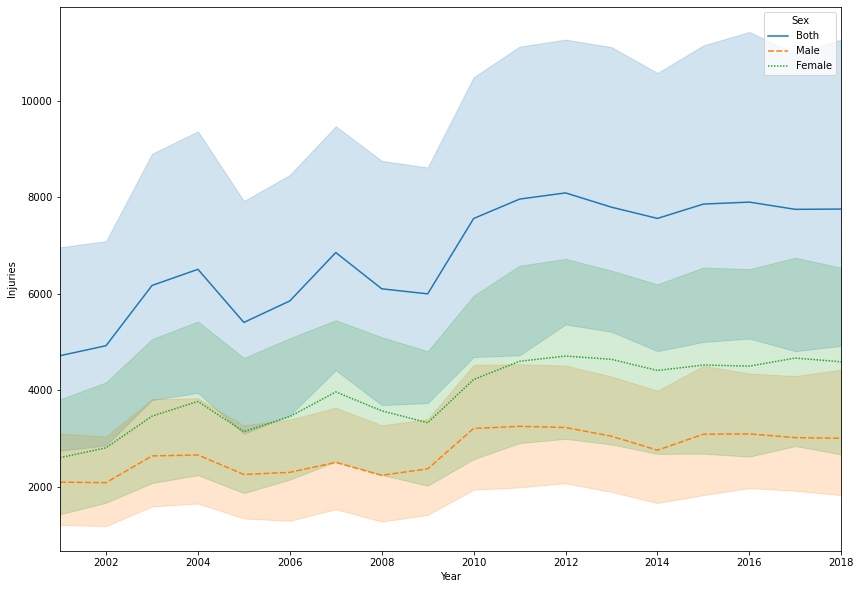

In [36]:
#Make lineplot 
plt.figure(figsize=(14,10))
sns.lineplot(data=Self_harm, x='Year', y='Injuries', hue='Sex', style="Sex")
plt.xlim(2001,2018)
plt.show()

In [37]:
#Filter Self_harm df
Self_harm_filter2=Self_harm[(Self_harm["Sex"]!="Both")] # exclude "both" sex because we alread have Sex sub-categories "M, F, U"
Self_harm_filter2=Self_harm_filter2[Self_harm_filter2["Sex"]!="U"] # exclude "U" sex because all injuries and population in this category equal to 0
Self_harm_filter2=Self_harm_filter2[Self_harm_filter2["Race/Ethnicity"]!="All Races"]# exclude "All" race category because we alread have Race sub-categories 
Self_harm_filter2=Self_harm_filter2[(Self_harm_filter2["Injuries"]!=0)|(Self_harm_filter2["Population"]!=0)] # exclude records if injuries or popualtion ==0
Self_harm_filter2.shape
print (f" There are {Self_harm_filter2.shape} records remained after the filter")

 There are (2631, 8) records remained after the filter


In [38]:
Self_harm_filter2

,Sex,Race/Ethnicity,Cause of Injury,Disposition,Age Group,Year,Injuries,Population
6,Male,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5862483
7,Male,Black,Self-harm All Injury Causes,All Cases,00-04,2001,0,1585658
8,Male,Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,1900490
9,Male,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,518145
11,Female,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5572690
...,...,...,...,...,...,...,...,...
5780,Male,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,85+,2018,0,116478
5783,Female,White Non-Hispanice,Self-harm All Injury Causes,All Cases,85+,2018,0,3349454
5784,Female,Black,Self-harm All Injury Causes,All Cases,85+,2018,0,366329
5785,Female,Hispanic,Self-harm All Injury Causes,All Cases,85+,2018,0,304983


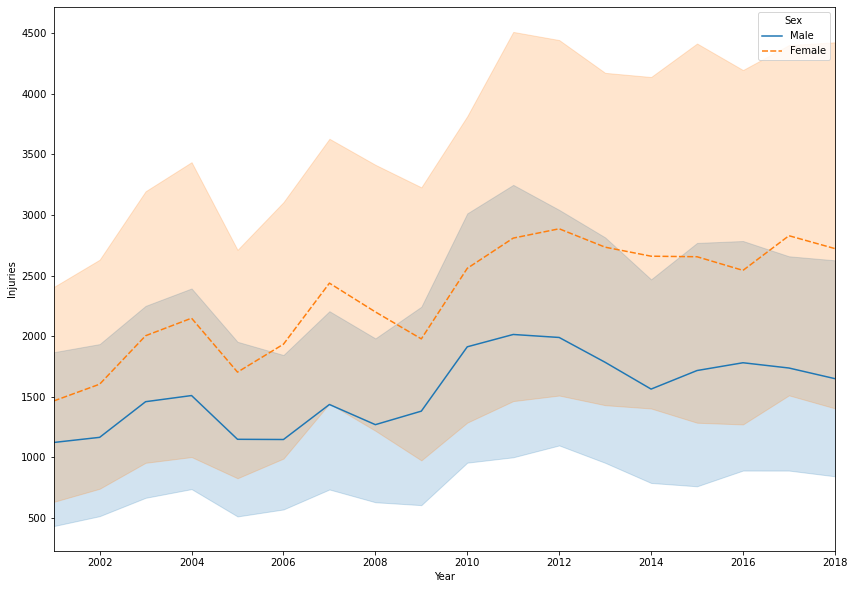

In [39]:
#Make lineplot on filtered data 
plt.figure(figsize=(14,10))
sns.lineplot(data=Self_harm_filter2, x='Year', y='Injuries', hue='Sex', style="Sex")
plt.xlim(2001,2018)
plt.show()

In [40]:
#Check on Population by year 
check_tot_pop=Self_harm_filter2.groupby("Year").agg({"Population":"sum"}).reset_index()
check_tot_pop

,Year,Population
0,2001,284968955
1,2002,287625193
2,2003,290107933
3,2004,292805298
4,2005,295516599
5,2006,298379912
6,2007,301231207
7,2008,304093966
8,2009,306771529
9,2010,308758105


To be done in the future work!

I wrangled the Self_harm data set and got the population splitted by age group, sex and race wich gave me the total population of the country per year. After wrangling our data i wanted to see if i am loosing big amount of the data so i pulled the population data per year from Census(The Census Bureau's Population Estimates Program (PEP) produces estimates of the population for the United States) in order to compare the population numbers and see the difference. 

In [41]:
#Load the population data set
#population_usa = ('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Data/Population_USA_Year.csv')
#Population_usa = pd.read_csv(population_usa)
#Population_usa

In [42]:
#Population_USA = Population.rename(columns={'label': 'Year'}) #Rename the column 'label' as 'Year'
#Population = Population.rename(columns={'Total Population': 'Total Population USA'}) #Rename the column 'Total Population' as 'Total Population USA'
#Population_filter = Population.iloc[0:19] # first 20 rows of dataframe
#Population_filter



In [43]:
#Population_Compare = check_tot_pop.merge(Population_filter, on='Year', how='inner')
#Population_Compare

In [44]:
#Differences = Population_filter['Year'] - check_tot_pop['Year']
#Differences 

# Load Social Media Data Set


In [45]:
social_media = ('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Data/users-by-social-media-platform.csv'
)


In [46]:
#Read the csv file into data frame 
Social_media = pd.read_csv(social_media)

In [47]:
#Call the shape method on Social_media to see size of the data
Social_media.shape

(142, 3)

In [48]:
#Call the head method on Social_media to print the first several rows of the data
Social_media.head()

,Entity,Year,Monthly active users (Statista and TNW (2019))
0,Facebook,2008,100000000
1,Facebook,2009,276000000
2,Facebook,2010,517750000
3,Facebook,2011,766000000
4,Facebook,2012,979750000


1. Check the data types and fix them 

In [49]:
#Call the dtypes method on Social_media dataset to see the tpyes of columns
Social_media.dtypes

Entity                                            object
Year                                               int64
Monthly active users (Statista and TNW (2019))     int64
dtype: object

There are no problems with the dtypes in the Social_media DataFrame.

In [50]:
#Check out 'Entity' column for  unique values and values
Social_media['Entity'].unique()
Social_media['Entity'].value_counts()

YouTube        14
Facebook       12
Flickr         10
Twitter        10
Orkut           9
Reddit          9
Weibo           9
MySpace         8
Friendster      8
WeChat          8
Tumblr          7
Hi5             7
Google+         7
Google Buzz     6
Instagram       6
Whatsapp        5
Pinterest       4
TikTok          2
Snapchat        1
Name: Entity, dtype: int64

In [51]:
#Check out 'Year' column for unique values
Social_media['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2004, 2005, 2006, 2007, 2002, 2003])

In [52]:
#Check out 'Monthly active users (Statista and TNW (2019))' column for unique values
Social_media['Monthly active users (Statista and TNW (2019))'].unique()

array([ 100000000,  276000000,  517750000,  766000000,  979750000,
       1170500000, 1334000000, 1516750000, 1753500000, 2035750000,
       2255250000, 2375000000,    3675135,    7399354,   14949270,
         29299875,   30000000,   41834525,   54708063,   66954600,
         79664888,   80000000,    3000000,    4470000,    5970054,
          7459742,    8989854,   24253200,   51008911,   28804331,
        166029650,  170000000,  107319100,  205654700,  254859015,
        298950015,  398648000,  495657000,  430000000,    9731610,
         19932360,   29533250,   55045618,   57893524,   59953290,
         46610848,  117500000,  250000000,  400000000,  550000000,
        750000000, 1000000000,     980036,   19490059,   54763260,
         69299875,   72408233,   70133095,   68046710,   46003536,
          4900180,    9865805,   14966180,   26916562,   44357628,
         47366905,   49941613,   47609080,   45067022,  143250000,
        195000000,  246500000,  291000000,     248309,     488

In [53]:
#Rename Monthly active users (Statista and TNW (2019) column as Users
Social_media = Social_media.rename(columns={'Monthly active users (Statista and TNW (2019))': 'Users'})
Social_media

,Entity,Year,Users
0,Facebook,2008,100000000
1,Facebook,2009,276000000
2,Facebook,2010,517750000
3,Facebook,2011,766000000
4,Facebook,2012,979750000
...,...,...,...
137,YouTube,2014,1249451725
138,YouTube,2015,1328133360
139,YouTube,2016,1399053600
140,YouTube,2017,1495657000


In [54]:
Social_mediaGrouped = Social_media.groupby(['Year', 'Entity']).agg({'Users': "sum"}).reset_index()
Social_mediaGrouped

,Year,Entity,Users
0,2002,Friendster,3000000
1,2003,Friendster,4470000
2,2004,Flickr,3675135
3,2004,Friendster,5970054
4,2004,MySpace,980036
...,...,...,...
137,2018,Weibo,431000000
138,2018,YouTube,1900000000
139,2019,Facebook,2375000000
140,2019,Pinterest,291000000


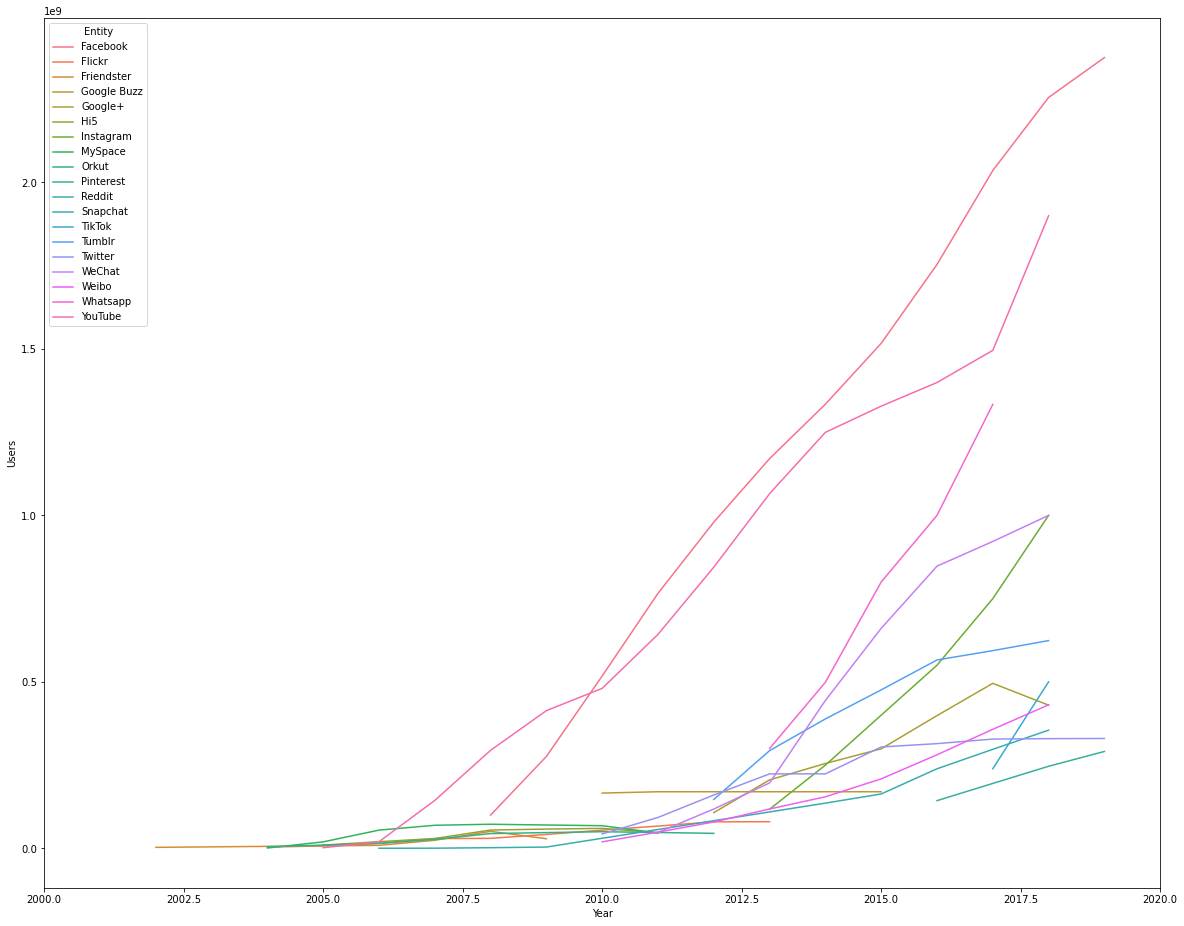

In [55]:
#Make lineplot 
plt.figure(figsize=(20,16), linewidth=10)
sns.lineplot(data=Social_media, x='Year', y='Users', hue='Entity')
plt.xlim(2000,2020)
plt.show()

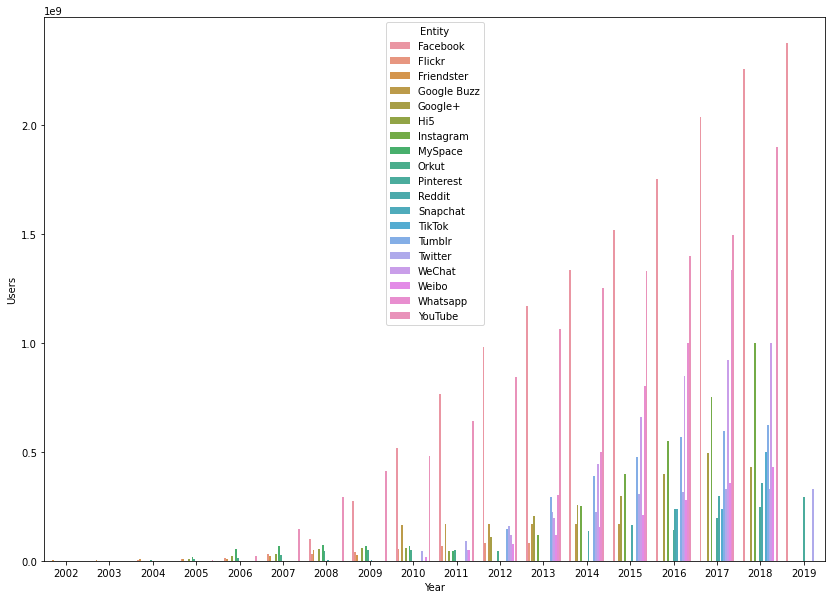

In [56]:
#Make barplot
fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot( x='Year', y='Users', hue='Entity', capsize=.4, ax=ax, data=Social_media)
plt.show()

Looking at the social media user data set, I want to see the data set in different perspective. I reshape the data frame to see user numbers for each entity per year.

In [57]:
pd.set_option('float_format', '{:f}'.format) # Print entire number 
Social_media['Users_2'] = Social_media['Users']/1000000 #Create 'User_2' column by deviding 'Users' column by 1000000 in order to see the entire number 
Social_media_reshape = Social_media.pivot(index="Year", columns="Entity", values="Users_2")
Social_media_reshape

Entity,Facebook,Flickr,Friendster,Google Buzz,Google+,Hi5,Instagram,MySpace,Orkut,Pinterest,Reddit,Snapchat,TikTok,Tumblr,Twitter,WeChat,Weibo,Whatsapp,YouTube
Year,,,,,,,,,,,,,,,,,,,
2002,nan,nan,3.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2003,nan,nan,4.470000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2004,nan,3.675135,5.970054,nan,nan,nan,nan,0.980036,4.900180,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2005,nan,7.399354,7.459742,nan,nan,9.731610,nan,19.490059,9.865805,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.946322
2006,nan,14.949270,8.989854,nan,nan,19.932360,nan,54.763260,14.966180,nan,0.248309,nan,nan,nan,nan,nan,nan,nan,19.878248
2007,nan,29.299875,24.253200,nan,nan,29.533250,nan,69.299875,26.916562,nan,0.488331,nan,nan,nan,nan,nan,nan,nan,143.932250
2008,100.000000,30.000000,51.008911,nan,nan,55.045618,nan,72.408233,44.357628,nan,1.944940,nan,nan,nan,nan,nan,nan,nan,294.493950
2009,276.000000,41.834525,28.804331,nan,nan,57.893524,nan,70.133095,47.366905,nan,3.893524,nan,nan,nan,nan,nan,nan,nan,413.611440
2010,517.750000,54.708063,nan,166.029650,nan,59.953290,nan,68.046710,49.941613,nan,nan,nan,nan,nan,43.250000,nan,19.532900,nan,480.551990


'nan' tells us that there is no record of user number for that year. It is because the entity did not exist at that time or the value is missing. I will keep the values as 'nan' because I may want to have descriptive statistics.  

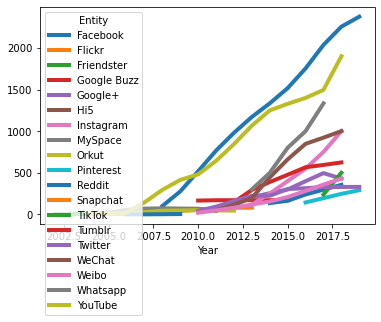

In [58]:
Social_media_reshape.plot.line(linewidth=4)

# Summary 

In [59]:
#Save the Data set Self_harm_filter2 as Self_harm_final
Self_harm_filter2.to_csv('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Final_Data/Self_harm_final.csv')
Self_harm_filter2.head()

,Sex,Race/Ethnicity,Cause of Injury,Disposition,Age Group,Year,Injuries,Population
6,Male,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5862483
7,Male,Black,Self-harm All Injury Causes,All Cases,00-04,2001,0,1585658
8,Male,Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,1900490
9,Male,Other Non-Hispanic,Self-harm All Injury Causes,All Cases,00-04,2001,0,518145
11,Female,White Non-Hispanice,Self-harm All Injury Causes,All Cases,00-04,2001,0,5572690


In [60]:
#Save the Data set Social_media_reshape as Social_media_final
Social_media_reshape.to_csv('/Users/hayaldargin/Desktop/Springboard/Springboard_Work/Capstone_2/Final_Data/Social_media_final.csv')
Social_media_reshape

Entity,Facebook,Flickr,Friendster,Google Buzz,Google+,Hi5,Instagram,MySpace,Orkut,Pinterest,Reddit,Snapchat,TikTok,Tumblr,Twitter,WeChat,Weibo,Whatsapp,YouTube
Year,,,,,,,,,,,,,,,,,,,
2002,nan,nan,3.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2003,nan,nan,4.470000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2004,nan,3.675135,5.970054,nan,nan,nan,nan,0.980036,4.900180,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2005,nan,7.399354,7.459742,nan,nan,9.731610,nan,19.490059,9.865805,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.946322
2006,nan,14.949270,8.989854,nan,nan,19.932360,nan,54.763260,14.966180,nan,0.248309,nan,nan,nan,nan,nan,nan,nan,19.878248
2007,nan,29.299875,24.253200,nan,nan,29.533250,nan,69.299875,26.916562,nan,0.488331,nan,nan,nan,nan,nan,nan,nan,143.932250
2008,100.000000,30.000000,51.008911,nan,nan,55.045618,nan,72.408233,44.357628,nan,1.944940,nan,nan,nan,nan,nan,nan,nan,294.493950
2009,276.000000,41.834525,28.804331,nan,nan,57.893524,nan,70.133095,47.366905,nan,3.893524,nan,nan,nan,nan,nan,nan,nan,413.611440
2010,517.750000,54.708063,nan,166.029650,nan,59.953290,nan,68.046710,49.941613,nan,nan,nan,nan,nan,43.250000,nan,19.532900,nan,480.551990
